In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
## checking if data is null anywhere
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


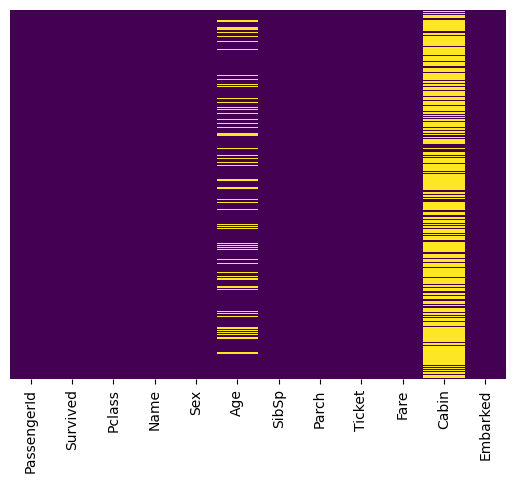

In [9]:
#### Now we have to check how much information is actually missing . 
## Best way is to do a heatmap
sns.heatmap(train.isnull(),  yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [10]:
##Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

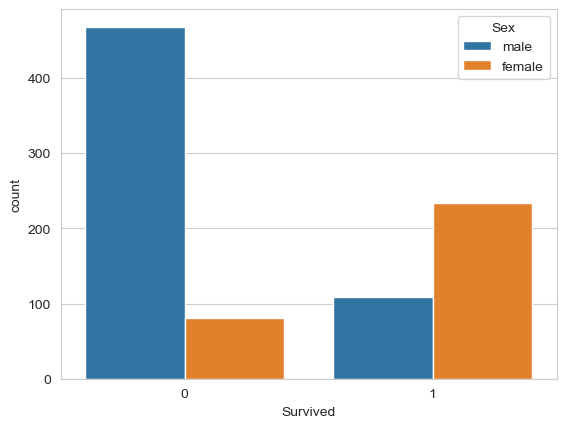

In [16]:
## some more analysis of the data
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train, hue="Sex")
plt.show()
## trends among males and females who survived and who didnt survive.

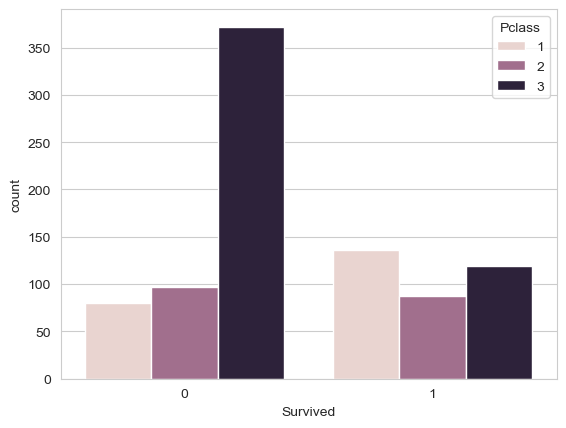

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train, hue="Pclass")
plt.show()
## a trend showing which class people survived more then others

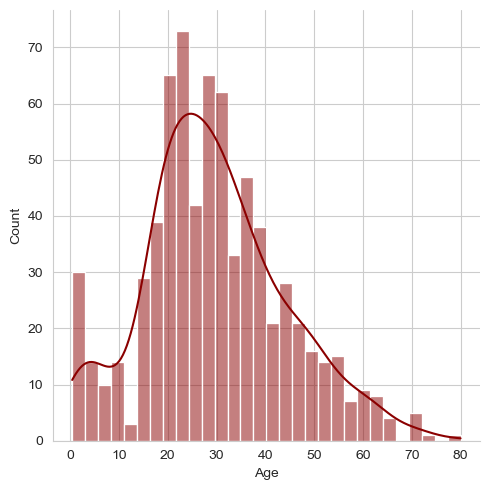

In [20]:
## analysis of the age.
sns.displot(train['Age'].dropna(),kde=True,color='darkred',bins=30)
plt.show()

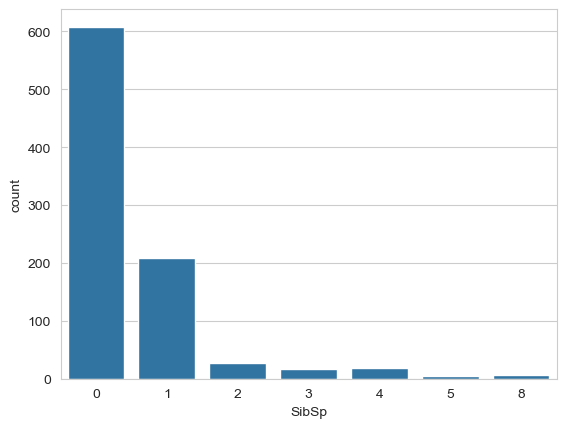

In [21]:
## sibling and spouse data.
sns.countplot(x='SibSp',data=train)
plt.show()

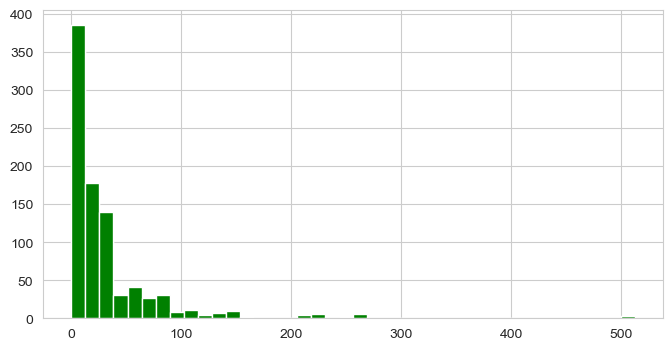

In [23]:
## fair data
train['Fare'].hist(color='green',bins=40,figsize=(8,4))
plt.show()

# Part two 
## Cleaning the data

___
## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


/var/folders/9z/840qmsq96lg4hk3nt3qk67rr0000gn/T/ipykernel_51878/1634902386.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')


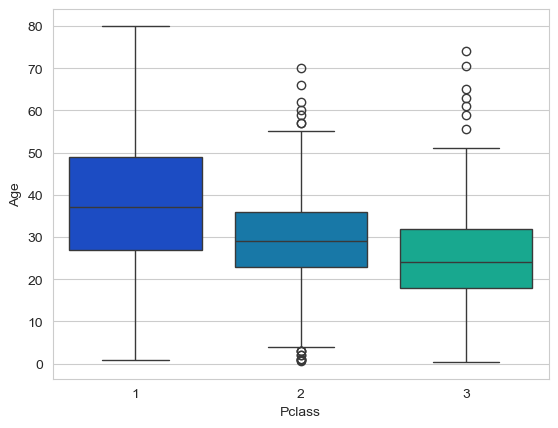

In [26]:

sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')
plt.show()

In [31]:
### imputation means filling in the missing data
def impute_age(cols):
    # Age = cols[0]
    # Pclass = cols[1]  ## outdated methods
    Age = cols.iloc[0]
    Pclass = cols.iloc[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [32]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

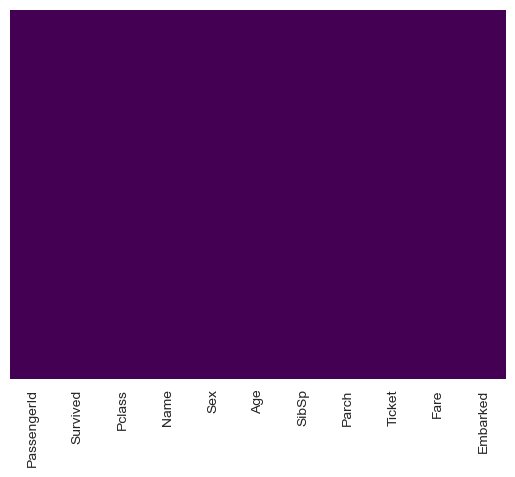

In [37]:
## now after cleaning the age data lets check again
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [36]:
## since cabin column has too much missing data, then we can safely delete that column 
train.drop("Cabin", axis=1, inplace=True)

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.
That means, like sex as male or female should be converted to 0 and 1, so that our ml algorithm identifies it correctly. 

In [50]:
sex = pd.get_dummies(train['Sex'], drop_first=True).astype("int")
embark = pd.get_dummies(train['Embarked'],drop_first=True).astype("int")
sex.head()
## issue of MULTICOLINEARITY
## if a row has gender female then ofcourse the male will be false. so we dont need that extra column
## hence we use drop_first = True

,male
0,1
1,0
2,0
3,0
4,1


In [51]:
train = pd.concat([train,sex,embark],axis=1)

In [54]:
train.head(2)  ## successfully added two 3 new coulumns

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [55]:
## now we dont want sex and embarked columns as we have created our own data sets using those. hence we will remove them, and some other columns too.

In [56]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)  ## a simple rule for now, if we want to do analysis of text data wait for NLP.

In [58]:
train.head() ## see the clean perfect data here. All numerical data without null values. 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [60]:
## we can drop passengerId too, as its not some useful info. We cant predict anything based on if a passenger survived because of his passenger id 
train.drop("PassengerId", axis=1, inplace=True)

In [61]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
